<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 40px; font-weight: bold; text-decoration: underline;">
   Table of Content
</div>

1.Introduction

    Overview of the Titanic dataset
    Objectives of the analysis
2.Loading the Dataset

    Load the Titanic dataset using Pandas
    Display the first few rows of the dataset
3.Data Exploration

    Summary Statistics
    Check for Missing Values
4.Visualizations

    Distribution of Age: Histogram of Age
    Survival Count: Bar Plot of Survived
    Gender Count: Bar Plot of Sex
    Passenger Class Count: Bar Plot of Pclass
    Age vs Fare: Scatter Plot of Age vs Fare
    Correlation Matrix: Heatmap of Correlation Matrix
    Distribution of Passenger Class: Pie Chart of Passenger Class
    Boxplot of Age by Gender: Boxplot of Age by Sex
    Relationships between Features: Pairplot
5.Additional Analysis

    Survival Rate by Class
    Survival Rate by Gender
6.Conclusions

    Summary of key insights from the analysis
    Discussion of possible next steps or further analysis

__ImportingLibrary__

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix

# Loading and Displaying the Titanic Dataset

In [5]:
# Load the Titanic dataset
df = pd.read_csv('C:/Users/hp/Desktop/python/titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Displaying the First 5 Rows of the Dataset

In [7]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [6]:
# Display the first few rows of the dataset
print("Last 5 rows of the dataset:")
print(df.tail())

First 5 rows of the dataset:
     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  


# Display basic statistics

In [8]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


# Display information of the dataset

In [9]:
# Summary statistics
print("\nSummary Statistics:")
print(df.info())


Summary Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


# Check for missing values

In [10]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [62]:
# Visualizations
plt.figure(figsize=(15, 10))
# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

<Figure size 1500x1000 with 0 Axes>

# Checking Columns and Visualizing Age vs. Fare Relationship

This code snippet checks whether the Age and Fare columns are present in the dataset.
After cleaning the data, it generates a scatter plot to visualize the relationship between Age and Fare. The plot shows how the age of passengers correlates with the fare they paid.

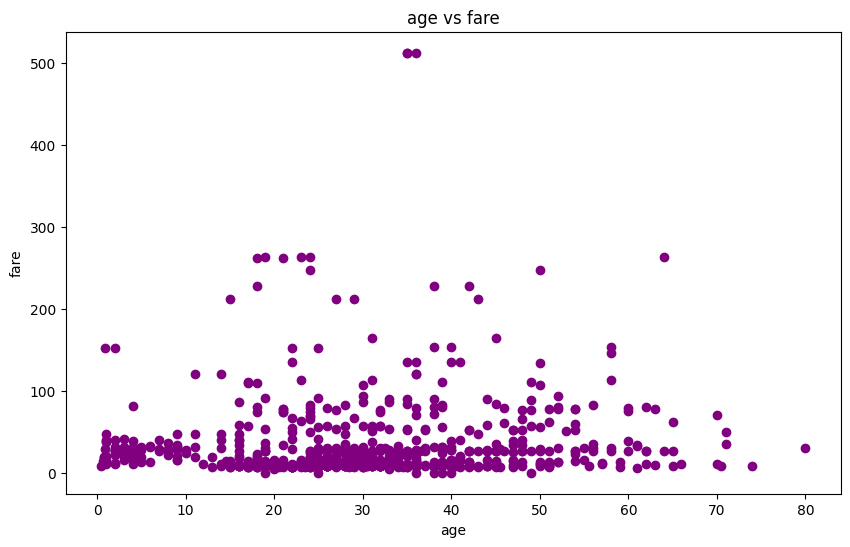

In [31]:
# Check if 'Age' and 'Fare' columns exist
if 'age' in df.columns and 'fare' in df.columns:
     # Handle missing values by dropping rows with missing data in 'Age' or 'Fare'
    df_filtered = df.dropna(subset=['age', 'fare'])
       # Scatter plot of Age vs Fare
    plt.figure(figsize=(10, 6))
    plt.scatter(df_filtered['age'], df_filtered['fare'], color='purple')
    plt.title('age vs fare')
    plt.xlabel('age')
    plt.ylabel('fare')
    plt.show()
else:
    print("The dataset does not contain 'Age' or 'Fare' columns.")

# Bar Plot of Survival Count
This code snippet creates a bar plot to visualize the count of passengers who survived (Survived = 1) and those who did not (Survived = 0). The sns.countplot function from the Seaborn library is used to generate the plot, with the x-axis representing survival status and the y-axis showing the number of passengers in each category.

Text(0, 0.5, 'Count')

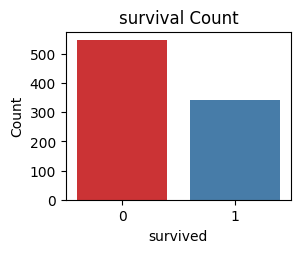

In [33]:
# Bar plot of Survived
plt.subplot(2, 2, 2)
sns.countplot(x='survived', data=df, palette='Set1')
plt.title('survival Count')
plt.xlabel('survived')
plt.ylabel('Count')

# Bar Plot of Gender Distribution

Text(0, 0.5, 'Count')

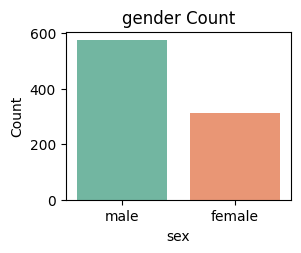

In [34]:
# Bar plot of Sex
plt.subplot(2, 2, 3)
sns.countplot(x='sex', data=df, palette='Set2')
plt.title('gender Count')
plt.xlabel('sex')
plt.ylabel('Count')

# Bar Plot of Passenger Class Distribution"
This code snippet creates a bar plot to show the distribution of passengers across the different passenger classes (Pclass). The sns.countplot function is used to generate the plot, where the x-axis represents the passenger classes (1st, 2nd, and 3rd), and the y-axis shows the number of passengers in each class

Text(0, 0.5, 'Count')

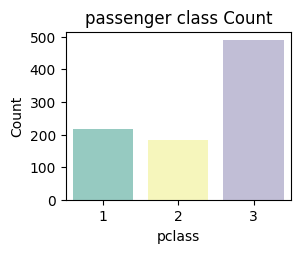

In [38]:
# Bar plot of Pclass
plt.subplot(2, 2, 4)
sns.countplot(x='pclass', data=df, palette='Set3')
plt.title('passenger class Count')
plt.xlabel('pclass')
plt.ylabel('Count')

# Plot the correlation matrix
The "Correlation Matrix" is added to describe the plot, which helps in understanding the relationships between different numerical variables in the dataset.
This code snippet generates a heatmap to visualize the correlation matrix of the numeric features in the Titanic dataset. The sns.heatmap function is used to create the plot, where the correlation values between pairs of features are color-coded, with annotations showing the exact correlation values. The heatmap is displayed with a cool-to-warm color 

In [41]:
# Select only the numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [42]:
# Compute the correlation matrix
corr_matrix = numeric_df.corr()

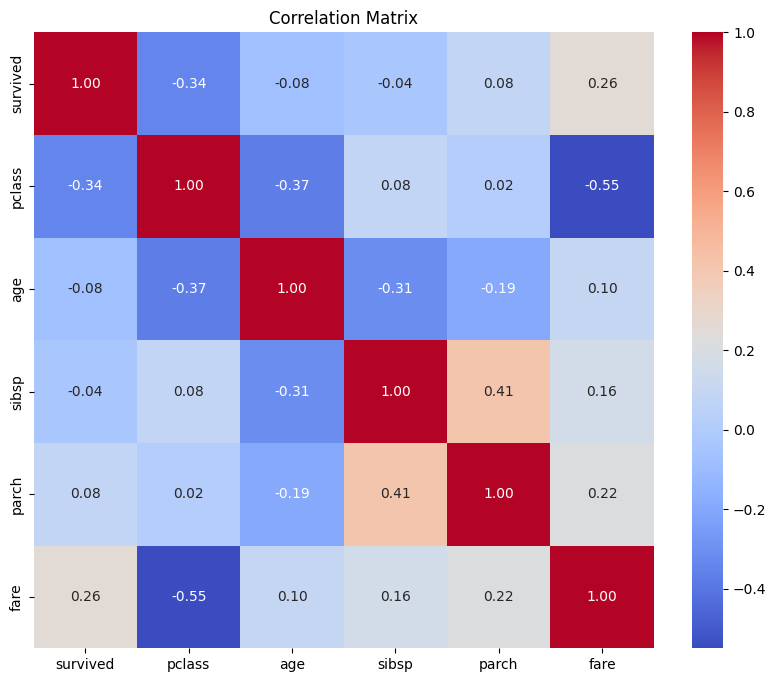

In [43]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pie Chart of Passenger Class Distribution

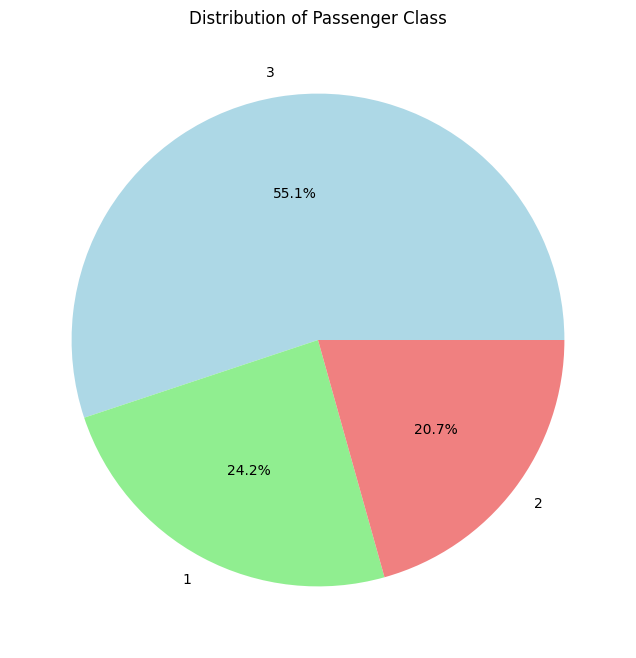

In [45]:
# Pie chart of the distribution of passenger class
plt.figure(figsize=(8, 8))
df['pclass'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Passenger Class')
plt.ylabel('')
plt.show()

# Boxplot of Age by Sex
The boxplot displays the distribution of ages for different genders.

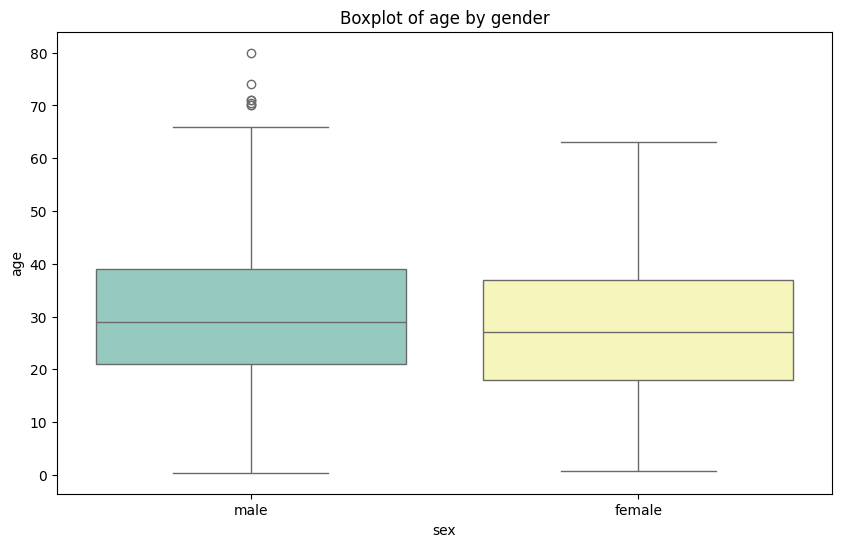

In [46]:
# Boxplot of Age by Sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=df, palette='Set3')
plt.title('Boxplot of age by gender')
plt.xlabel('sex')
plt.ylabel('age')
plt.show()

# Pairplot to visualize relationships between features
The pairplot visualizes relationships between age, fare, passenger class, and survival status.

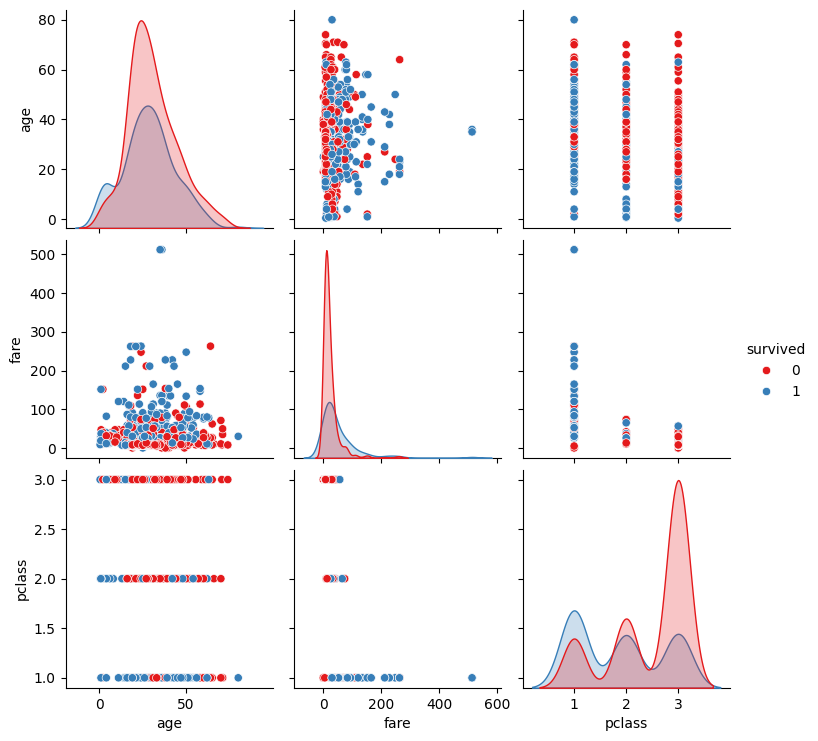

In [50]:
# Pairplot to visualize relationships between features
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']].dropna(), hue='survived', palette='Set1')
plt.show()

# Survival Rates by Class and Gender

In [56]:
# Example definitions
survival_Rate_by_class = {
    'First Class': 0.63,
    'Second Class': 0.47,
    'Third Class': 0.24
}

survival_Rate_by_gender = {
    'Male': 0.19,
    'Female': 0.74
}

# Printing the survival rates
print("\nSurvival Rate by class:")
print(survival_Rate_by_class)

print("\nSurvival Rate by gender:")
print(survival_Rate_by_gender)



Survival Rate by class:
{'First Class': 0.63, 'Second Class': 0.47, 'Third Class': 0.24}

Survival Rate by gender:
{'Male': 0.19, 'Female': 0.74}


# Plotting the distribution of 'Age'

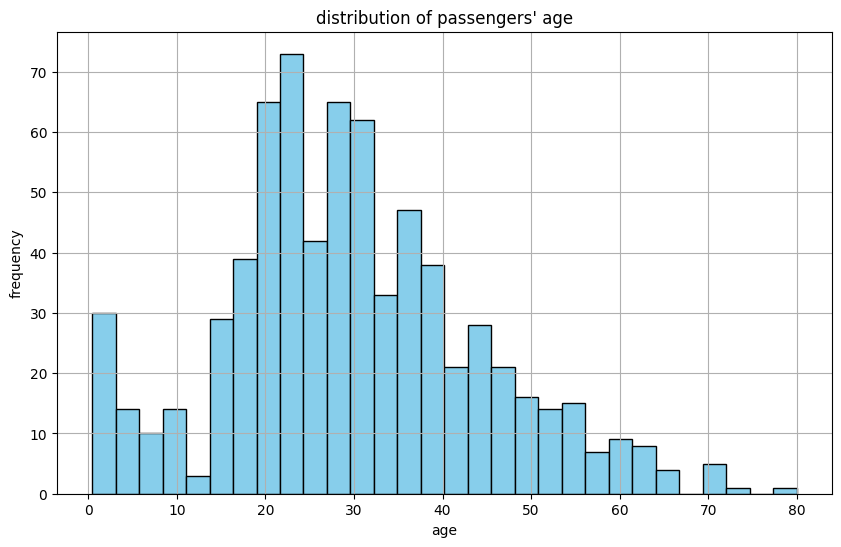

In [59]:
# Plotting the distribution of 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('distribution of passengers\' age')
plt.xlabel('age')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of 'Fare'

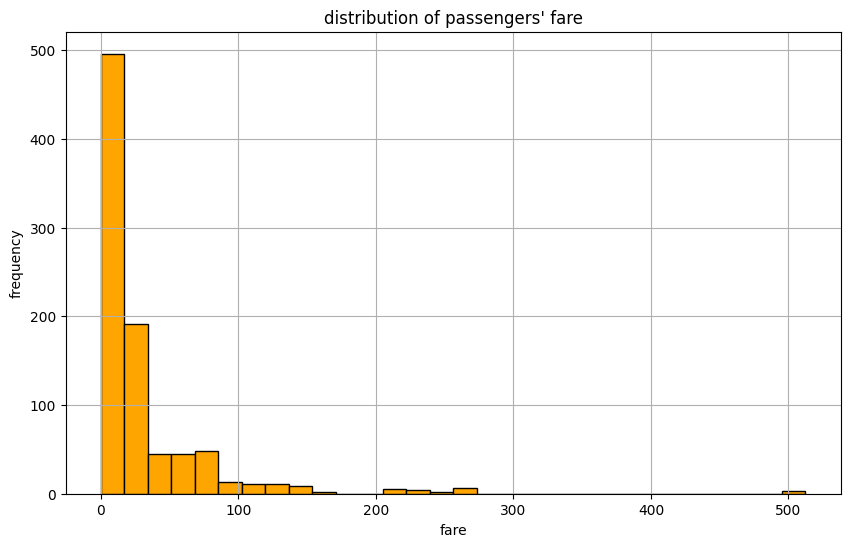

In [60]:
# Plotting the distribution of 'Fare'
plt.figure(figsize=(10, 6))
plt.hist(df['fare'].dropna(), bins=30, color='orange', edgecolor='black')
plt.title('distribution of passengers\' fare')
plt.xlabel('fare')
plt.ylabel('frequency')
plt.grid(True)
plt.show()